# Salary_hike -> Build a prediction model for Salary_hike

## Get the data & perform EDA

In [38]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [39]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [40]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [41]:
salary_data.shape

(30, 2)

## Perform Assumptions

## Linearity Test
1. Scatter Plot
2. lmplot

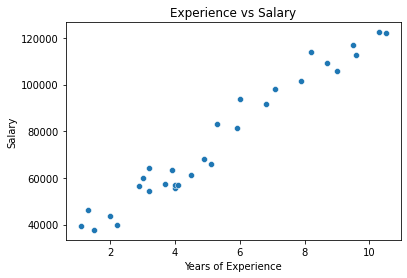

In [42]:
sns.scatterplot(x='YearsExperience', y='Salary', data=salary_data)
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

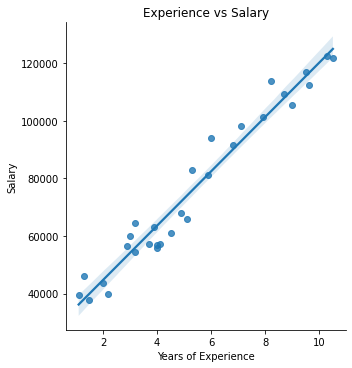

In [43]:
sns.lmplot(x='YearsExperience', y='Salary', data=salary_data)
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### From above graphs, we can conclude that most of the observations are following a linear relationship

## Normality test
1. Input features must follow normal distribution
2.  Histogram, Distplot test

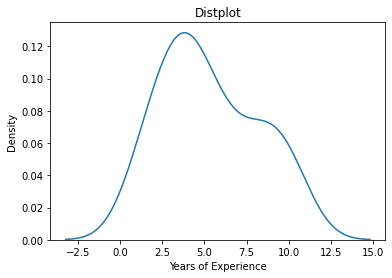

In [44]:
sns.distplot(x=salary_data['YearsExperience'], hist=False)
plt.title('Distplot')
plt.xlabel('Years of Experience')
plt.ylabel('Density')
plt.show()

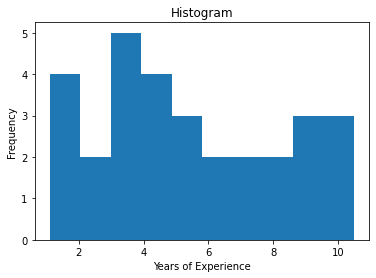

In [45]:
plt.hist(x=salary_data['YearsExperience'])
plt.title('Histogram')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

In [46]:
salary_data['YearsExperience'].skew()

0.37956024064804106

In [47]:
salary_data['YearsExperience'].kurt()

-1.0122119403325072

### From above graph we can say that input feature is fairly symmetrical. Normality test passed.

## Multicollinearity Test
1. Correlation Matrix
2. Variance Inflation Factor [VIF]

### Since, there is only 1 input factor hence, there is no multicollinearity in the given data

## No Autoregression
* As there is no time based inputs in given data

## Homoscedasticity test & Zero Residual Mean test 
* To be done after model training!!

## Model Building 

In [48]:
import statsmodels.formula.api as smf

In [49]:
x_sal = salary_data.drop(columns='Salary', axis=1)
y_sal = salary_data[['Salary']]

In [50]:
linear_model_sal = smf.ols(formula='y_sal ~ x_sal', data=salary_data).fit()

In [51]:
linear_model_sal.params

Intercept    25792.200199
x_sal         9449.962321
dtype: float64

## Model Evaluation

In [52]:
y_pred = linear_model_sal.predict(x_sal)
y_pred = pd.DataFrame(data=y_pred, columns=['Salary'])
y_pred.round()

,Salary
0,36187.0
1,38077.0
2,39967.0
3,44692.0
4,46582.0
5,53197.0
6,54142.0
7,56032.0
8,56032.0
9,60757.0


In [53]:
error_sal = y_sal - y_pred
error_sal.round()

,Salary
0,3156.0
1,8128.0
2,-2236.0
3,-1167.0
4,-6691.0
5,3445.0
6,6008.0
7,-1587.0
8,8413.0
9,-3568.0


In [54]:
linear_model_sal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        12:06:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x_sal       9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From above model we can see that r2 value is significant for considering it to be best model. We will check if performance can be increased some bit using transformations.

In [55]:
linear_model_sal2 = smf.ols(formula='y_sal ~ np.log(x_sal)', data=salary_data).fit()

In [56]:
linear_model_sal2.params

Intercept        14927.97177
np.log(x_sal)    40581.98796
dtype: float64

In [57]:
linear_model_sal2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_sal   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           3.25e-13
Time:                        12:06:11   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(x_sal)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From above transformation the r2 value has decreased sharply, hence we will further transform to check if it can be increased.

In [58]:
linear_model_sal3 = smf.ols(formula='np.log(y_sal) ~ x_sal', data=salary_data).fit()

In [59]:
linear_model_sal3.params

Intercept    10.507402
x_sal         0.125453
dtype: float64

In [60]:
linear_model_sal3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(y_sal)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           7.03e-18
Time:                        12:06:11   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
x_sal          0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From above transformation the r2 value has increased compared to linear_model_sal 2, hence we will further transform to check if it can be increased.

In [61]:
salary_data['Sq_exp'] = salary_data.YearsExperience**2
linear_model_sal4 = smf.ols(formula='np.log(y_sal) ~ x_sal + Sq_exp', data=salary_data).fit()

In [62]:
linear_model_sal4.params

Intercept    10.336852
x_sal         0.202382
Sq_exp       -0.006614
dtype: float64

In [63]:
linear_model_sal4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(y_sal)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           3.95e-18
Time:                        12:06:11   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3369      0.067    154.368      0.000      10.199      10.474
x_sal          0.2024      0.027      7.601      0.000       0.148       0.257
Sq_exp        -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From above transformation the r2 value has increased compared to linear_model_sal 3, hence we will further transform to check if it can be increased.

In [64]:
salary_data['Sq_exp'] = salary_data.YearsExperience**2
linear_model_sal5 = smf.ols(formula='y_sal ~ x_sal + Sq_exp', data=salary_data).fit()

In [65]:
linear_model_sal5.params

Intercept    26214.932677
x_sal         9259.283888
Sq_exp          16.392566
dtype: float64

In [66]:
linear_model_sal5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           3.59e-19
Time:                        12:06:11   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
x_sal       9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
Sq_exp        16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The r2 value is exactly same for linear_model_sal &  linear_model_sal 5, but the AIC & BIC values are lower for model_sal. Hence, we will consider the model_sal for dataset since r2 value is high, AIC & BIC scores are lower.

### ===================================================================